# Exercise 1 - Data Analysis

## Data Creation

**Author:** Leonardo Teixeira

---

### 1) Exploring Class Separability in 2D

Understanding how data is distributed is the first step before designing a network architecture. In this exercise, I generated and visualized a two-dimensional dataset to explore how data distribution affects the complexity of the decision boundaries a neural network would need to learn.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sample = pd.DataFrame()

**Class 0**: Mean = [2,3], Standard Deviation = [0.8,2.5]
- 100 samples

In [3]:
mu_x, mu_y = 2, 3
std_x, std_y = 0.8, 2.5

n = 100

X = np.random.normal(mu_x, std_x, n)
Y = np.random.normal(mu_y, std_y, n)

first_class = pd.DataFrame()
first_class['X'] = X
first_class['Y'] = Y

LABEL = 0
first_class['Class'] = [LABEL] * n

In [4]:
sample = pd.concat([sample, first_class], ignore_index=True)

**Class 1:** Mean = [5,6], Standard Deviation = [1.2,1.9]
- Samples: 100

In [5]:
mu_x, mu_y = 5, 6
std_x, std_y = 1.2, 1.9

n = 100

X = np.random.normal(mu_x, std_x, n)
Y = np.random.normal(mu_y, std_y, n)

second_class = pd.DataFrame()
second_class['X'] = X
second_class['Y'] = Y

LABEL = 1
second_class['Class'] = [LABEL] * n

In [6]:
sample = pd.concat([sample, second_class], ignore_index=True)

**Class 2:** Mean = [8,1], Standard Deviation = [0.9,0.9]
- Samples: 100

In [7]:
mu_x, mu_y = 8, 1
std_x, std_y = 0.9, 0.9

n = 100

X = np.random.normal(mu_x, std_x, n)
Y = np.random.normal(mu_y, std_y, n)

third_class = pd.DataFrame()
third_class['X'] = X
third_class['Y'] = Y

LABEL = 2
third_class['Class'] = [LABEL] * n

In [8]:
sample = pd.concat([sample, third_class], ignore_index=True)

**Class 3:** Mean = [15,4], Standard Deviation = [0.5,2.0]
- Samples: 100

In [9]:
mu_x, mu_y = 15, 4
std_x, std_y = 0.5, 2.0

n = 100

X = np.random.normal(mu_x, std_x, n)
Y = np.random.normal(mu_y, std_y, n)


fourth_class = pd.DataFrame()

fourth_class['X'] = X
fourth_class['Y'] = Y

LABEL = 3
fourth_class['Class'] = [LABEL] * n

In [10]:
sample = pd.concat([sample, fourth_class], ignore_index=True)

In [11]:
sample.describe()

,X,Y,Class
count,400.000000,400.000000,400.000000
mean,7.417252,3.625411,1.500000
std,4.937880,2.632504,1.119434
min,-0.124592,-4.251560,0.000000
25%,3.238868,1.400057,0.750000
50%,6.551081,3.526337,1.500000
75%,11.272105,5.420759,2.250000
max,16.603796,12.517612,3.000000


**Scatter plot**

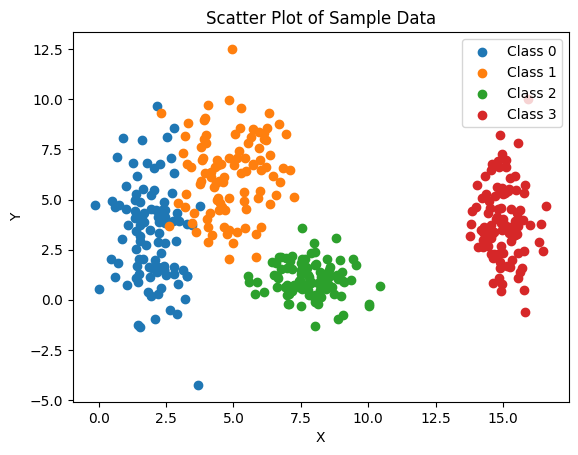

In [12]:
# Scatter plot for sample X and Y with title and legend
for label, group in sample.groupby('Class'):
    plt.scatter(group['X'], group['Y'], label=f'Class {label}')

plt.title('Scatter Plot of Sample Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

### Data Distribution and Class Relations

#### Linear vs Nonlinear Separability: Perceptron vs MLP

A **Perceptron** is a simple neural network that can only learn linear decision boundaries. It works well when classes are linearly separable, such as isolating Class 3 (red) from the rest with a vertical line. However, it struggles with overlapping or nonlinear boundaries, like those between Class 0 and Class 1, where a straight line cannot perfectly separate the classes.

A **Multi-Layer Perceptron (MLP)**, on the other hand, is a deeper neural network capable of learning complex, nonlinear boundaries. It can adapt to curved or piecewise boundaries, making it suitable for datasets with overlapping or compact clusters, such as the boundaries between Class 0, 1, and 2 in this dataset.

In summary:
- Perceptron: Linear boundaries only. Good for simple, well-separated classes.
- MLP: Nonlinear boundaries. Can separate overlapping or complex clusters.


#### 1. General Distribution

The dataset contains four distinct classes, each with unique spatial characteristics:

- **Class 0 (blue):** Concentrated on the left side of the plot, with a vertical spread and moderate variance. The cluster is elongated, resembling an ellipse.
- **Class 1 (orange):** Located to the right of Class 0, with noticeable overlap at the boundary. The distribution is more spread out but still roughly elliptical.
- **Class 2 (green):** Positioned further right and slightly below, forming a compact and nearly spherical cluster.
- **Class 3 (red):** Clearly isolated on the far right, very compact and dense, with no visible overlap with other classes.


#### 2. Overlap and Separability

- **Class 0 vs Class 1:** Significant overlap exists at their borders. A simple linear boundary would not perfectly separate them; a nonlinear (curved or piecewise) boundary is required for better separation.
- **Class 2:** This class is relatively compact and separated from Class 1, though a few orange points extend toward the green cluster. With an appropriate curved boundary, Class 2 can be effectively isolated.
- **Class 3:** Completely isolated on the right side. A single vertical linear boundary can separate it from all other classes with high accuracy.


#### 3. Shape of Clusters

- **Class 0 (blue):** Vertically elongated, almost elliptical.
- **Class 1 (orange):** More spread out, roughly elliptical.
- **Class 2 (green):** Spherical and compact.
- **Class 3 (red):** Tightly spherical and very dense.


#### 4. Outliers

A few scattered points exist on the fringes of Class 0 and Class 1, but they do not significantly distort the overall distribution. The dataset is relatively clean with minimal outliers.


#### 5. Decision Boundaries

- **Class 3 (red):** Can be separated from the others using a vertical linear boundary.
- **Class 0 and Class 1:** Require a curved or adaptive boundary due to their overlap, but can be separated in a satisfactory way with a line.
- **Class 1 and Class 2:** A slightly curved boundary is needed, though a linear approximation may work with some misclassifications.
- **Class 2:** Can be isolated with an oval-shaped boundary.


#### Neural Network Perspective

A neural network (MLP) would learn both linear and nonlinear boundaries:
- **Linear boundary:** A vertical line can perfectly separate Class 3 (red) from the others. This is a case where a Perceptron or a single linear neuron would succeed.
- **Nonlinear boundaries:** The separation between Class 0 and Class 1, and between Class 1 and Class 2, require curved or piecewise boundaries due to overlap and cluster shapes. These are only possible with a multi-layer neural network (MLP).
- **Class 2:** Can be isolated with an oval-shaped (nonlinear) boundary.

In summary, linear boundaries are sufficient for some separations (e.g., Class 3), but nonlinear boundaries are required for the rest. Deep neural networks (MLPs) are capable of learning both types, while simple Perceptrons are limited to linear boundaries only.

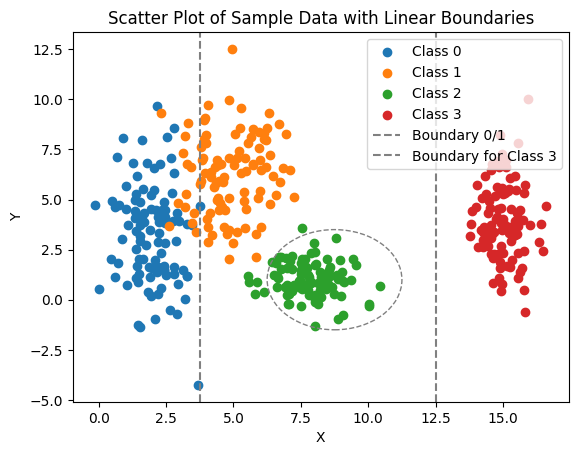

In [13]:
# Scatter plot for sample X and Y with title and legend
for label, group in sample.groupby('Class'):
    plt.scatter(group['X'], group['Y'], label=f'Class {label}')

# Linear boundaries (vertical lines) for visual separability
plt.axvline(x=3.75, color='gray', linestyle='--', label='Boundary 0/1')
plt.axvline(x=12.5, color='gray', linestyle='--', label='Boundary for Class 3')
# An oval-shaped boundary around Class 2.
ellipse = plt.Circle((8.75, 1), 2.5, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(ellipse)

plt.title('Scatter Plot of Sample Data with Linear Boundaries')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

---

### 2) Non-Linearity in Higher Dimensions

Simple neural networks (like a Perceptron) can only learn linear boundaries. Deep networks excel when data is not linearly separable. This exercise challenges to create and visualize such a dataset.

**Class 0**: 
- Mean = [0,0,0,0,0] 
- Covariance Matrix:

    |       | X1   | X2   | X3   | X4   | X5   |
    |-------|------|------|------|------|------|
    | **X1** | 1.0  | 0.8  | 0.1  | 0.0  | 0.0  |
    | **X2** | 0.8  | 1.0  | 0.3  | 0.0  | 0.0  |
    | **X3** | 0.1  | 0.3  | 1.0  | 0.5  | 0.0  |
    | **X4** | 0.0  | 0.0  | 0.5  | 1.0  | 0.2  |
    | **X5** | 0.0  | 0.0  | 0.0  | 0.2  | 1.0  |

- 500 samples

In [14]:
sample = pd.DataFrame()

In [15]:
mu = np.zeros(5)

cov = [
    [1.0, 0.8, 0.1, 0.0, 0.0],
    [0.8, 1.0, 0.3, 0.0, 0.0],
    [0.1, 0.3, 1.0, 0.5, 0.0],
    [0.0, 0.0, 0.5, 1.0, 0.2],
    [0.0, 0.0, 0.0, 0.2, 1.0]
]

n = 500

five_D = np.random.multivariate_normal(mu, cov, size=n)

first_class = pd.DataFrame()

LABEL = 0

first_class = pd.DataFrame(five_D, columns=['X1', 'X2', 'X3', 'X4', 'X5'])
first_class['Class'] = [LABEL] * n


In [16]:
sample = pd.concat([sample, first_class], ignore_index=True)

**Class 1**: 
- Mean = [1.5,1.5,1.5,1.5,1.5] 
- Covariance Matrix:

    |       | X1   | X2   | X3   | X4   | X5   |
    |-------|------|------|------|------|------|
    | **X1** | 1.5  | -0.7  | 0.2  | 0.0  | 0.0  |
    | **X2** | -0.7  | 1.5  | 0.4  | 0.0  | 0.0  |
    | **X3** | 0.2  | 0.4  | 1.5  | 0.6  | 0.0  |
    | **X4** | 0.0  | 0.0  | 0.6  | 1.5  | 0.3  |
    | **X5** | 0.0  | 0.0  | 0.0  | 0.3  | 1.5  |

- 500 samples

In [17]:
mu = [1.5, 1.5, 1.5, 1.5, 1.5]

cov = [
    [1.5, -0.7, 0.2, 0.0, 0.0],
    [-0.7, 1.5, 0.4, 0.0, 0.0],
    [0.2, 0.4, 1.5, 0.6, 0.0],
    [0.0, 0.0, 0.6, 1.5, 0.3],
    [0.0, 0.0, 0.0, 0.3, 1.5]
]

n = 500

five_D = np.random.multivariate_normal(mu, cov, size=n)

second_class = pd.DataFrame()

LABEL = 1

second_class = pd.DataFrame(five_D, columns=['X1', 'X2', 'X3', 'X4', 'X5'])
second_class['Class'] = [LABEL] * n


In [18]:
sample = pd.concat([sample, second_class], ignore_index=True)

**PCA (Principal Component Analysis)**

In [19]:
from sklearn.decomposition import PCA

X = sample.drop('Class', axis=1)
Y = sample['Class']

# pca

pca = PCA(n_components=2)
pca.fit(X)

print("Auto-valores:")
print(pca.explained_variance_)
print()

print("Auto-vetores:")
print(pca.components_)
print()

print("Variância explicada:")
print(pca.explained_variance_ratio_)
print()

Auto-valores:
[4.73224748 1.51973896]

Auto-vetores:
[[ 0.40054839  0.43530306  0.51838821  0.49817485  0.36492151]
 [-0.43697651 -0.49798243 -0.09823877  0.46405048  0.57971659]]

Variância explicada:
[0.50420373 0.16192265]



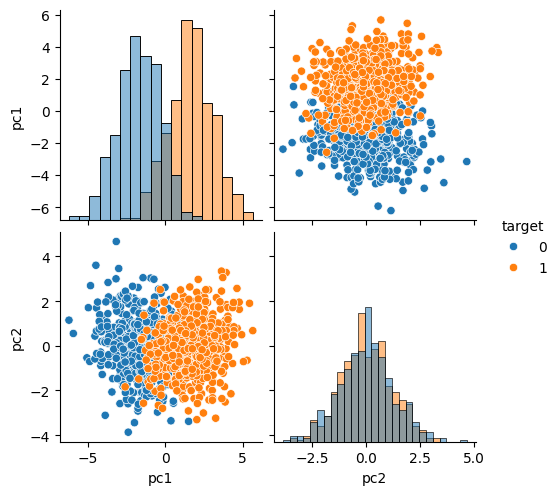

In [20]:
X = pca.transform(X)
new_df = pd.DataFrame(X, columns=['pc1', 'pc2'])
new_df['target'] = sample['Class']
sns.pairplot(
    new_df, vars = ['pc1', 'pc2'],
    hue='target', diag_kind="hist"
)
plt.show()


### Analysis of Class Separability

Looking at the scatter plots, we observe that the two classes (`target = 0` in blue and `target = 1` in orange) show **partial overlap**. Along **pc1**, there is a clearer separation: class 0 tends to concentrate on the left side, while class 1 is more to the right. However, along **pc2**, both classes overlap significantly, creating a region where linear separation becomes more challenging.

The histograms reinforce this: while `pc1` shows bimodality and better separation, `pc2` distributions for both classes are highly overlapping. This indicates that a **linear boundary alone would not perfectly separate the classes**.

### Non-linear Relationship

Because of the overlap in the distributions, the decision boundary is **non-linear**. A straight line would misclassify a significant number of points, especially in the central region where the two classes blend together. Instead, the optimal boundary would need to curve and adapt to the distribution of the data in both principal components.

### Why a Neural Network?

Neural networks are suitable for this problem because:

- They can **model non-linear decision boundaries** by combining multiple layers of neurons with non-linear activation functions.
- They adaptively learn complex relationships in the data, capturing patterns that simple linear models (like logistic regression) would miss.
- With sufficient training, a neural network could separate the two classes with **higher accuracy**, handling the central overlap more effectively by shaping the boundary around clusters of points.

In summary, while a linear model would struggle due to overlapping regions, a neural network’s flexibility makes it a strong candidate to classify these two groups.

---

### 3) Preparing Real-World Data for a Neural Network

Using a real dataset from Kaggle’s *Spaceship Titanic* to prepare the data for training a neural network that employs the **hyperbolic tangent (tanh)** activation function in its hidden layers. The `Transported` column serves as the target variable, indicating whether a passenger was transported to an alternate dimension during the collision of the Spaceship Titanic with a spacetime anomaly.

### Dataset Objective
The goal is to predict the value of the `Transported` column (`True` or `False`) based on the personal and travel records of passengers. This involves preprocessing the provided features into a suitable numerical representation for the neural network.

### Files and Structure
- **train.csv** – Records for about two-thirds of the passengers (~8,700). Includes features and the `Transported` target column.  
- **test.csv** – Records for the remaining one-third (~4,300). Your task is to predict `Transported` for these passengers.  
- **sample_submission.csv** – A template file showing the correct submission format.

### Feature Descriptions

In [21]:
train = pd.read_csv('./data/train.csv')

test = pd.read_csv('./data/test.csv')

sample_submission = pd.read_csv('./data/sample_submission.csv')

In [22]:
train.dtypes.to_frame()

,0
PassengerId,object
HomePlanet,object
CryoSleep,object
Cabin,object
Destination,object
Age,float64
VIP,object
RoomService,float64
FoodCourt,float64
ShoppingMall,float64


In [23]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [ ]:
from sklearn.preprocessing import StandardScaler
import warnings

def preprocess(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()

    # --- Numeric imputations ---
    num_cols = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
    for c in num_cols:
        df[c] = pd.to_numeric(df[c], errors="coerce")
        df[c].fillna(df[c].median(), inplace=True)

    # --- Cabin parsing: Deck / Num / Side ---
    # Safe split even when Cabin is NaN or malformed
    cabin_parts = df["Cabin"].astype("string").str.split("/", n=2, expand=True)
    df["Deck"] = cabin_parts[0]
    df["Num"]  = pd.to_numeric(cabin_parts[1], errors="coerce")
    df["Side"] = cabin_parts[2]
    # Impute Num as numeric
    df["Num"].fillna(df["Num"].median(), inplace=True)

    # --- Categorical handling ---
    cat_cols = ["HomePlanet", "Destination", "Deck", "Side"]
    for c in cat_cols:
        df[c] = df[c].astype("string").fillna("Unknown")

    # --- Binary/object booleans to {0,1} ---
    bin_map = {True: 1, False: 0, "True": 1, "False": 0, "true": 1, "false": 0}
    for b in ["CryoSleep", "VIP"]:
        df[b] = df[b].map(bin_map)
        # If anything still NaN (e.g., unknown), fill with mode (fallback to 0)
        if df[b].isna().any():
            mode_val = df[b].mode().iloc[0] if not df[b].mode().empty else 0
            df[b].fillna(mode_val, inplace=True)

    # --- Drop obvious non-predictive identifiers ---
    drop_cols = ["PassengerId", "Name", "Cabin"]
    existing_drop = [c for c in drop_cols if c in df.columns]
    df.drop(columns=existing_drop, inplace=True)

    # --- One-hot encode categoricals (keep all levels; model handles collinearity) ---
    X_cat = pd.get_dummies(df[cat_cols], drop_first=False, dtype=int)

    # --- Numeric block (including parsed Num) ---
    num_all = num_cols + ["Num"]
    X_num_raw = df[num_all].copy()

    # --- Scale numerics (mean 0, std 1) for tanh ---
    scaler = StandardScaler()
    X_num = pd.DataFrame(
        scaler.fit_transform(X_num_raw),
        columns=num_all,
        index=df.index
    )

    # --- Binary features ---
    X_bin = df[["CryoSleep", "VIP"]].astype(int)

    # --- Concatenate feature blocks ---
    X = pd.concat([X_num, X_bin, X_cat], axis=1)

    # (Optional) If label exists, keep it outside this function.
    # y = df["Transported"].astype(int) if "Transported" in df.columns else None

    # Return only the features
    return X

X = preprocess(train)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_12776\1864039179.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[c].fillna(df[c].median(), inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_12776\1864039179.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [25]:
X.dtypes

Age                          float64
RoomService                  float64
FoodCourt                    float64
ShoppingMall                 float64
Spa                          float64
VRDeck                       float64
Num                          float64
CryoSleep                      int64
VIP                            int64
HomePlanet_Earth               int64
HomePlanet_Europa              int64
HomePlanet_Mars                int64
HomePlanet_Unknown             int64
Destination_55 Cancri e        int64
Destination_PSO J318.5-22      int64
Destination_TRAPPIST-1e        int64
Destination_Unknown            int64
Deck_A                         int64
Deck_B                         int64
Deck_C                         int64
Deck_D                         int64
Deck_E                         int64
Deck_F                         int64
Deck_G                         int64
Deck_T                         int64
Deck_Unknown                   int64
Side_P                         int64
S

In [28]:
X.Age.value_counts()

Age
-0.124841    438
-0.334037    324
-0.752431    320
-0.543234    311
-0.682698    293
            ... 
 3.222304      4
 3.501233      3
 3.431501      3
 3.292036      2
 3.361769      2
Name: count, Length: 80, dtype: int64

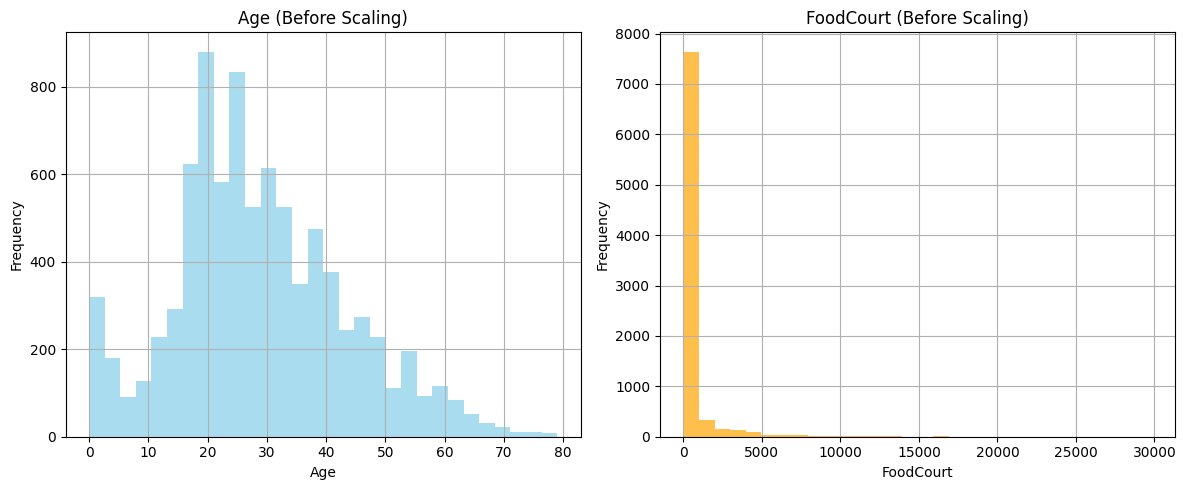

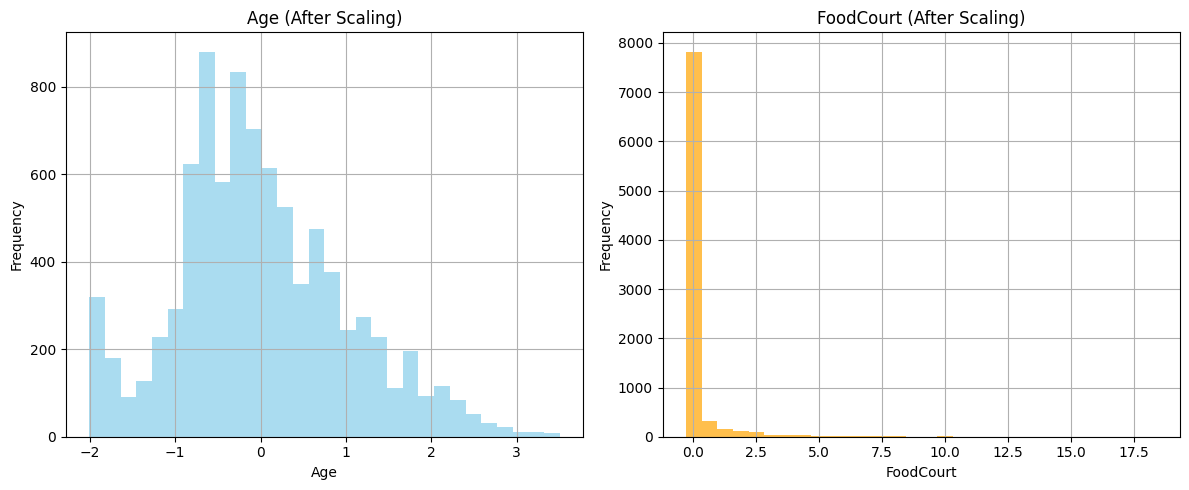

In [29]:
# Histograms for Age and FoodCourt before scaling
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
train['Age'].hist(ax=axes[0], bins=30, color='skyblue', alpha=0.7)
axes[0].set_title('Age (Before Scaling)')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

train['FoodCourt'].hist(ax=axes[1], bins=30, color='orange', alpha=0.7)
axes[1].set_title('FoodCourt (Before Scaling)')
axes[1].set_xlabel('FoodCourt')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Histograms for Age and FoodCourt after scaling
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
X['Age'].hist(ax=axes[0], bins=30, color='skyblue', alpha=0.7)
axes[0].set_title('Age (After Scaling)')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

X['FoodCourt'].hist(ax=axes[1], bins=30, color='orange', alpha=0.7)
axes[1].set_title('FoodCourt (After Scaling)')
axes[1].set_xlabel('FoodCourt')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()